In [1]:
from utilities import *
from perceptron import *
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from tqdm import tqdm

In [2]:
def data_creation(m, n):
    size = (m,n)
    X = (np.random.binomial(1, 0.5, size) -0.5) * 2
    y = X[:, 0]
    return X, y

def data_creation_winnow(m, n):
    size = (m,n)
    X = np.random.binomial(1, 0.5, size)
    y = X[:, 0]
    return X, y
    
class perceptron:
  def __init__(self, num_inputs):
    self.weights = np.zeros(num_inputs)

  def predict(self, inputs):
    # no kernel method applied.
    return np.sign(np.dot(inputs, self.weights))

  def train(self, inputs, labels, learning_rate):
    y_pred = self.predict(inputs)

    errors = labels - y_pred

    for i in range(len(inputs)):
      self.weights += learning_rate * errors[i] * inputs[i]

X_train, y_train = data_creation(4,10)
X_test, y_test = data_creation(4,10)


In [40]:
def sample_complexity(y_true, y_pred):
    mistakes = np.count_nonzero(np.not_equal(y_true, y_pred))
    return mistakes/len(y_pred)

def least_square(X_train, y_train, X_test, y_test):
    # weights = np.linalg.inv(X_train.T.dot(X_train) + 0.1 * np.eye(X_train.shape[1])).dot(X_train.T).dot(y_train)
    weights = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    y_pred = np.sign(X_test.dot(weights))
    return sample_complexity(y_test, y_pred)

def knn(X_train, y_train, X_test, y_test):
    tree = KDTree(X_train)
    y_pred = []
    for i in range(X_test.shape[0]):
        # x_test = X_test[i,:]
        index = tree.query([X_test[i,:]], k=1)[1][0][0]
        y_pred.append(y_train[index])
    # print(y_train[index])
    return sample_complexity(y_test, y_pred)

def perceptron_method(X_train, y_train, X_test, y_test):
    model = perceptron(X_train.shape[1])
    model.train(X_train, y_train, learning_rate=0.1)
    y_pred = model.predict(X_test)
    return sample_complexity(y_test, y_pred)

def winnow(X_train, y_train, X_test, y_test):
    m, n = X_train.shape
    weights = np.ones(n) * 1.0
    for t in range(m):
        tmp = np.dot(X_train[t,:], weights)
        if tmp < n:
            y_hat = -1
        else:
            y_hat = 1
        if y_train[t] != y_hat:
            weights = weights * 2.0 ** ((y_train[t]-y_hat) * X_train[t,:])
    y_pred = []
    for i in range(X_test.shape[0]):
        # y_pred.append(np.sign(np.dot(X_test[i,:], weights))/2 + 0.5)
        y_pred.append(np.sign(np.dot(X_test[i,:], weights)))
    # print(y_pred)
    return sample_complexity(y_test, y_pred)


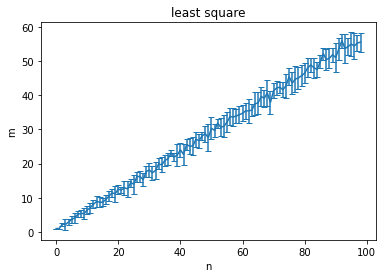

In [48]:
# least square
m_mean, m_std  = [], []
for n in range(1, 100):
    m_list = []
    for _ in range(10):
        for m in range(1,1000):
            X_train, y_train = data_creation(m,n)
            X_test, y_test = data_creation(10*n,n)

            error = least_square(X_train, y_train, X_test, y_test)

            if error <= 0.1:
                m_list.append(m)
                break
    m_mean.append(np.mean(m_list))
    m_std.append(np.std(m_list))

plt.errorbar(range(len(m_mean)), m_mean, yerr=m_std, capsize=3)
plt.xlabel("n")
plt.ylabel("m")
plt.title("least square")
plt.savefig('least_square')

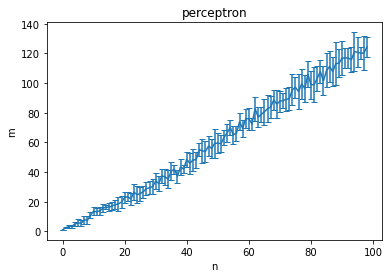

In [47]:
# perceptron
ls_m, ls_m_std  = [], []
m_mean, m_std  = [], []
for n in range(1, 100):
    m_list = []
    for _ in range(10):
        for m in range(1,1000):
            X_train, y_train = data_creation(m,n)
            X_test, y_test = data_creation(10*n,n)

            error = perceptron_method(X_train, y_train, X_test, y_test)

            if error <= 0.1:
                m_list.append(m)
                break
    m_mean.append(np.mean(m_list))
    m_std.append(np.std(m_list))

plt.errorbar(range(len(m_mean)), m_mean, yerr=m_std, capsize=3)
plt.xlabel("n")
plt.ylabel("m")
plt.title("perceptron")
plt.savefig("perceptron")

100%|██████████| 99/99 [00:11<00:00,  8.80it/s] 


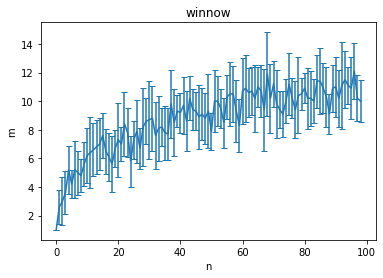

In [46]:
# winnow
ls_m, ls_m_std  = [], []
m_mean, m_std  = [], []
for n in tqdm(range(1, 100)):
    m_list = []
    for _ in range(10):
        for m in range(1,1000):
            X_train, y_train = data_creation(m,n)
            X_test, y_test = data_creation(10*n,n)

            error = winnow(X_train, y_train, X_test, y_test)

            if error <= 0.1:
                m_list.append(m)
                break
    m_mean.append(np.mean(m_list))
    m_std.append(np.std(m_list))

plt.errorbar(range(len(m_mean)), m_mean, yerr=m_std, capsize=3)
plt.xlabel("n")
plt.ylabel("m")
plt.title("winnow")
plt.savefig("winnow")

100%|██████████| 29/29 [06:26<00:00, 13.32s/it]


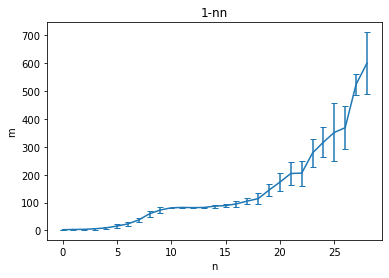

In [32]:
m_mean, m_std  = [], []
for n in tqdm(range(1, 30)):
    m_list = []
    for _ in range(10):
        for m in range(1,1000):
            X_train, y_train = data_creation(m,n)
            X_test, y_test = data_creation(500,n)

            error = knn(X_train, y_train, X_test, y_test)

            if error <= 0.1:
                m_list.append(m)
                break
    m_mean.append(np.mean(m_list))
    m_std.append(np.std(m_list))

plt.errorbar(range(len(m_mean)), m_mean, yerr=m_std, capsize=3)
plt.xlabel("n")
plt.ylabel("m")
plt.title("1-nn")
plt.savefig('knn')